In [1]:
import pandas as pd
import scipy
import numpy as np 
import os #cwd tools 
import matplotlib.mlab as mlab
import seaborn as sns
from astropy.stats import sigma_clip
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit
from scipy import stats
from astropy.io import fits #allows python to interpurt fits data files 
from glob import glob # Unix style pathname pattern expansion

%matplotlib inline
sns.set()

In [6]:
# --- Parameters for Plot Outputs --- 

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams["font.family"] = "Times New Roman"


# plt.style.available[:5]
# plt.style.use('Solarize_Light2')


In [7]:
os.getcwd() #current directory indicator 

'E:\\Dropbox\\UCD - Physics Undergrad\\3 - Third Year\\1. First Semester\\PHYC3170 Advanced Labs\\2. CCD\\Programming'

# Defining Functions 

In [8]:
# --- Function that returns mean counts, deviation, temperture and exposure based on pixels a, b, x, y --- 

# --- Print Master function --- 

def master(name, a, b, x, y):
    filelst = glob(name)
    
    mean_array = []
    std_array = [] 
    temp_array = []
    exp_array = []
    
    for file in filelst: 
        
        image = fits.open(file)
        
        mean = (image[0].data[a:b, x:y]).mean()
        mean_array.append(mean)
        
        std = (image[0].data[a:b, x:y]).std()
        std_array.append(std)
        
        temp = image[0].header['CCD-TEMP']
        temp_array.append(temp)
        
        exp = image[0].header['EXPTIME']
        exp_array.append(exp)
    
    print('Mean:', np.round(np.mean(mean_array), 3), 'counts', 'σ:', np.round(np.mean(std_array), 3), 'Temp:', np.round(np.mean(temp_array), 3), '°C', 'Exposure:', np.round(np.mean(exp_array), 3), 'seconds' )    

    
# --- Array master function --- 
    
def master_array(name, a, b, x, y):
    filelst = glob(name)
    
    mean_array = []
    std_array = [] 
    temp_array = []
    array = []
    
    for file in filelst: 
        
        image = fits.open(file)
        
        mean = (image[0].data[a:b, x:y]).mean()
        mean_array.append(mean)
        
        std = (image[0].data[a:b, x:y]).std()
        std_array.append(std)
            
        temp = image[0].header['CCD-TEMP']
        temp_array.append(temp)

    return mean_array, std_array, temp_array 

def sigma_clipping(name): 
    
    image_list = [fits.getdata(image) for image in glob(name)]
    clipped_array = [] 
    array_length = len(image_list)

    for image in image_list: 
        clipped_array = sigma_clip(image_list, sigma = 3) #creates an array of each pixel clipped 
        
    return np.sum(clipped_array, axis=0)/array_length #sums each pixel entry and divides by the number of frames take to obtain avg. 
    
    
# def sigma_clip(name, stg): 
#     image_list = [fits.getdata(image) for image in glob(name)]
#     array_length = len(image_list)


    

In [9]:
%%time
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\1. Dark_Currents_n8\exp_1')

files = glob("dark_single*")
all_images = [] 
pixels = []

for file in files: 
    image = fits.getdata(file)
    all_images.append(image)

all_images = np.asarray(all_images)
print(np.shape(all_images))

result = np.empty((all_images.shape[1], all_images.shape[2])) #np.zeros((np.shape(all_images)[1], np.shape(all_images)[2]))
print(np.shape(result))

for i in range(0, all_images.shape[1]):
    for j in range(0, all_images.shape[2]):
        pixels = all_images[:, i, j] #returns 10 (From images) values for a specific pixel 
        clipped_pixel = sigma_clip(pixels, sigma = 3).mean() #returns a clipped pixel 
        result = np.append(result, clipped_pixel)
        
        
        

#        #         result = np.reshape(pixels, (-1, 2))
#         result = np.append(result, clipped.mean())
#         print(result)
       
#         result = np.reshape(pixels, (-1, 2))       
#         print(pixels)    
#         result = sigma_clip(pixels, sigma = 3)
#         
#         return pixels
#         print(pixels)
#         print(pixels/clipped)


(10, 1039, 1391)
(1039, 1391)


KeyboardInterrupt: 

In [10]:
# print(np.shape(all_images)[1])

# print(pixels)
print(np.shape(result))
print(result)

(1448782,)
[  0.    0.    0.  ... 256.3 265.7 264.1]


# Importing Data

### Importing Dark Current Images under various exposure and tempertures

#### Darks taken at -7.8°C with 10 frames taken at various exposures

Mean: 265.468 counts σ: 16.053 Temp: -7.8 °C Exposure: 1.0 seconds
(1039, 1391)


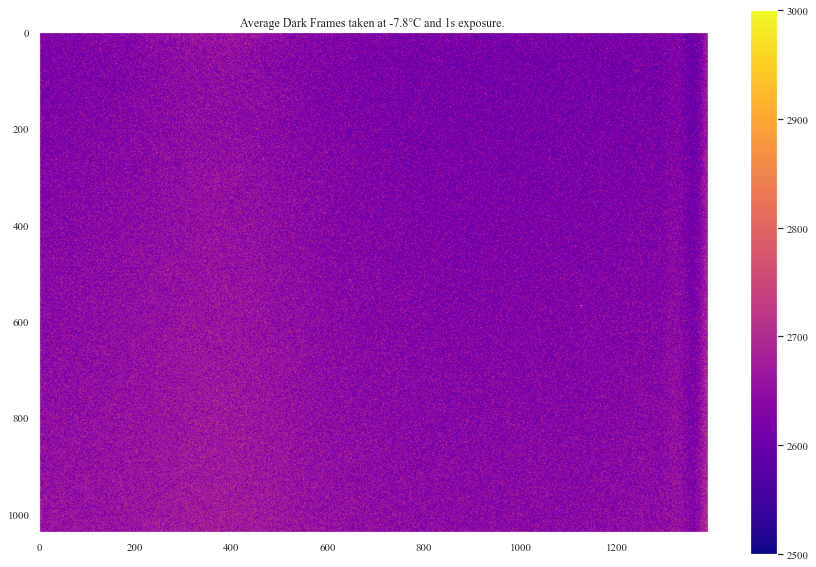

In [11]:
# --- Directory Change --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\1. Dark_Currents_n8\exp_1')

# --- Data Import ---

dark_n7_exp_1 = master('dark_single*', 646, 746, 470, 570) # 100x100 center frame 

image_list = [fits.getdata(image) for image in glob('dark_single*')] # Obtains an average image across all frames 
mean_image_dark_n10 = np.sum(image_list, axis=0)
medium_image_dark_n10 = np.median(image_list)

# --- Plot Parameters --- 

plt.imshow(mean_image_dark_n10, cmap = 'plasma')
plt.clim(2500,3000)
plt.title("Average Dark Frames taken at -7.8°C and 1s exposure. ")
plt.grid()
plt.colorbar()
plt.savefig('mean_image_dark_n78.png', dpi = 300)


print(np.shape(mean_image_dark_n10))

NameError: name 'norm' is not defined

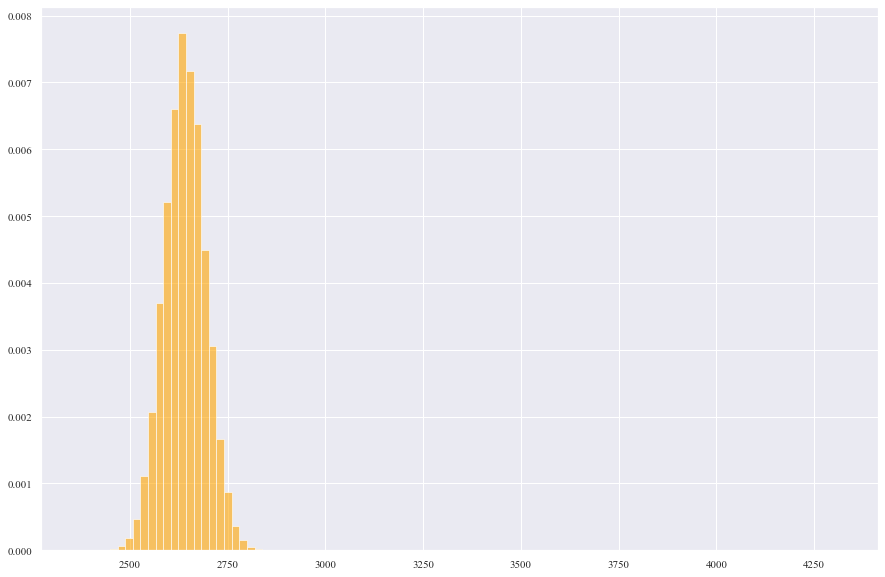

In [12]:

test2 = mean_image_dark_n10
# Fit a normal distribution to the data:
mu, std = stats.norm.fit(test2.flatten())

# Plot the histogram.
plt.hist(test2.flatten(), bins= 100, density = True, alpha = 0.6, color='orange')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
#--- Sigma Clipping --- 

test = sigma_clipping('dark_single*') 
print(test.mean())
#--- Plot Parameters  --- 

plt.imshow(test, cmap = 'plasma')
plt.title("Average Dark Frames taken at -7.8°C and 1s exposure. (Clipped) ")
plt.grid()
# plt.clim(2500,3000)
plt.colorbar()
plt.savefig('mean_image_dark_n78_clipped.png', dpi = 300)

In [ ]:
# dat = mean_image_dark_n10.flatten()
# dist = stats.norm()

# bins = 100 
# mu, sigma = stats.norm.fit(dat)
# plt.grid()
# histogram1 = plt.hist(dat, bins, range = (2400, 2900)) # .flatten turns into a 1-D ndarray 

In [ ]:
# --- Directory Change --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\1. Dark_Currents_n8\exp_5')

# --- Data Import ---

dark_n7_exp_5 = master('dark_single*', 646, 746, 470, 570)

image_list = [fits.getdata(image) for image in glob('dark_single*')]
mean_image_bias_n10 = np.sum(image_list, axis=0)

# --- Plot Parameters --- 

plt.imshow(mean_image_bias_n10, cmap = 'plasma')
plt.title("Average Dark Frames taken at -7.8°C and 5s exposure. ")
plt.grid()
plt.clim(2500,3000)
plt.colorbar()
plt.savefig('mean_image_dark_n785.png', dpi = 300)

In [ ]:
# --- Directory Change --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\1. Dark_Currents_n8\exp_10')

# --- Data Import ---

dark_n7_exp_10 = master('dark_single*', 646, 746, 470, 570)

print(dark_n7_exp_10)

image_list = [fits.getdata(image) for image in glob('dark_single*')]
mean_image_bias_n10 = np.sum(image_list, axis=0)

# --- Plot Parameters --- 

plt.imshow(mean_image_bias_n10, cmap = 'plasma')
plt.title("Average Darks frames at -7.8°C at 10s exposure. ")
plt.grid()
plt.clim(2500,3000)
plt.colorbar()
plt.savefig('mean_image_bias_n7810.png', dpi = 300)

#### Darks taken at 2°C with 3 frames taken at various exposures

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_2\exp_10')
dark_2_exp_10 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_2\exp_30')
dark_2_exp_30 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_2\exp_60')
dark_2_exp_60 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_2\exp_100')
dark_2_exp_100 = master('dark_current*', 646, 746, 470, 570)

#### Darks taken at 0°C with 3 frames taken at various exposures

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_0\exp_10')
dark_n0_exp_10 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_0\exp_30')
dark_n0_exp_30 = master('dark_current*', 646, 746, 470, 570)


os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_0\exp_60')
dark_n0_exp_60 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_0\exp_100')
dark_n0_exp_100 = master('dark_current*', 646, 746, 470, 570)

#### Darks taken at -2°C with 3 frames taken at various exposures

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n2\exp_10')
dark_n2_exp_10 = master_array('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n2\exp_30')
dark_n2_exp_30 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n2\exp_60')
dark_n2_exp_60 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n2\exp_100')
dark_n2_exp_100 = master('dark_current*', 646, 746, 470, 570)

#### Darks taken at -4°C with 3 frames taken at various exposures

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n4\exp_10')
dark_n4_exp_10 = master_array('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n4\exp_30')
dark_n4_exp_30 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n4\exp_60')
dark_n4_exp_60 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n4\exp_100')
dark_n4_exp_100 = master('dark_current*',646, 746, 470, 570)

#### Darks taken at -6°C with 3 frames taken at various exposures

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n6\exp_10')
dark_n6_exp_10 = master_array('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n6\exp_30')
dark_n6_exp_30 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n6\exp_60')
dark_n6_exp_60 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n6\exp_100')
dark_n6_exp_100 = master('dark_current*', 646, 746, 470, 570)

#### Darks taken at -8°C with 3 frames taken at various exposures

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n8\exp_10')
dark_n8_exp_10 = master_array('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n8\exp_30')
dark_n8_exp_30 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n8\exp_60')
dark_n8_exp_60 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\2. Dark_Currents_temp_vary\temp_n8\exp_100')
dark_n8_exp_100 = master('dark_current*', 646, 746, 470, 570)

#### Intial Dark Test Frams

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\3. intial_test\t_1')
test_dark_n8 = master('dark_current*', 646, 746, 470, 570)

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\3. intial_test\t_2')
test_dark_n6 = master('dark_current*', 646, 746, 470, 570)

### Importing data for bias images 

#### Bias taken at 22°C with 3 frames taken at 0.001 exposure

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\master_bias_roomtemperture')
master('dark_single_*', 646, 746, 470, 570)

#### Bias taken at 2°C with 3 frames taken at 0.001 exposure

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\master_bias')
master('bias_*', 646, 746, 470, 570)

#### Bias taken at -10°C with 3 frames taken at 0.001 exposure

In [ ]:
# --- Directory Change --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\2. Bias\bias_ntp_day2')

# --- Data Import ---

master('bias_ntp_*', 646, 746, 470, 570)

image_list = [fits.getdata(image) for image in glob('bias_ntp_*')]
mean_image_bias_n10 = np.sum(image_list, axis=0)

# --- Plot Parameters --- 

plt.imshow(mean_image_bias_n10, cmap = 'plasma')
plt.title("Average Bias fram at -10°C ")
plt.grid()
plt.colorbar()
plt.savefig('mean_image_bias_n10.png', dpi = 300)




In [ ]:
# --- Sigma Plot --- 

#--- Sigma Clipping --- 

mean_image_bias_n10_clip = sigma_clipping('bias_ntp_*', 3) 
print(mean_image_bias_n10_clip.mean())

#--- Plot Parameters  --- 

plt.imshow(mean_image_bias_n10_clip, cmap = 'plasma')
plt.title("Average Bias  Frames taken at -7.8°C and 0.001s exposure. (Clipped) ")
plt.grid()
# plt.clim(2500, 3000)
plt.colorbar()
plt.savefig('mean_image_bias_n78_clipped.png', dpi = 300)

### Flat intensity test 

In [ ]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\saturation')
master('saturation_*', 646, 746, 470, 570)

### Flat Run with < 50,000 counts 

Mean: 47613.485 counts σ: 503.784 Temp: -8.75 °C Exposure: 7.0 seconds


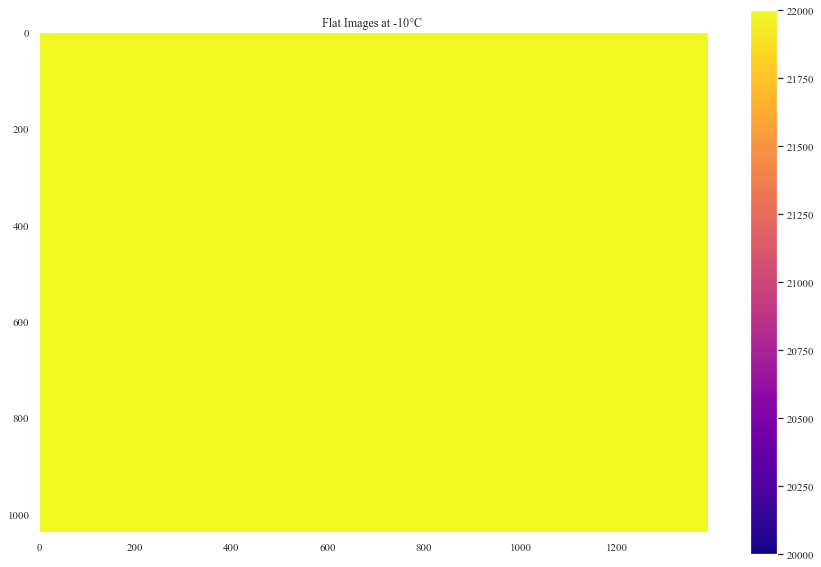

In [16]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\3. Flats\flat_ntp_2')
master('flat_*', 0, 200, 200, 400)

image_list = [fits.getdata(image) for image in glob('flat_*')]
mean_image_flat_n10 = np.sum(image_list, axis=0)

plt.imshow(mean_image_flat_n10, cmap = 'plasma', vmin= 20000, vmax=22000)
plt.title("Flat Images at -10°C ")
plt.grid()
plt.colorbar()
plt.savefig('mean_image_flat_n10.png', dpi = 300)

### Gain and Readnoise Calculations

The Janesick Equations are as follows, 


<div align="center">  $flatdif = flat_1 - flat_2$  </div>
<div align="center">  $biasdif = bias_1 - bias_2 $ </div>
<div align="center">  $gain = \frac{({\bar{flat_1} + \bar{flat_2}}) - (\bar{bias_1} - \bar{bias_2})}{(\sigma_{fd}^2 - \sigma_{bd}^2)} $    </div>
                       

In [ ]:
# --- Flat Import and Calculation --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\3. Flats\flat_ntp_2')

flat_1_image = fits.open('flat_568.fit')
flat_2_image = fits.open('flat_623.fit') 



flat_1_image_data = np.int64(flat_1_image[0].data[646:746, 470:570])
flat_2_image_data = np.int64(flat_2_image[0].data[646:746, 470:570])

flat_1_image_clip = sigma_clip(flat_1_image_data, sigma = 3)
flat_2_image_clip = sigma_clip(flat_2_image_data, sigma = 3)

flat_dif = flat_1_image_clip - flat_2_image_clip
σ_fd = flat_dif.std()

print('flat dif std:', "{0:.3g}".format(σ_fd))


# --- Bias Import and Calculation --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\2. Bias\bias_ntp_day2')

bias_1_image = fits.open('bias_ntp_263.fit')
bias_2_image = fits.open('bias_ntp_309.fit') 

bias_1_image_data = np.int64(bias_1_image[0].data[646:746, 470:570])
bias_2_image_data = np.int64(bias_2_image[0].data[646:746, 470:570])

bias_1_image_clip = sigma_clip(bias_1_image_data, sigma = 3)
bias_2_image_clip = sigma_clip(bias_2_image_data, sigma = 3)

bias_dif = bias_1_image_clip - bias_2_image_clip 

σ_bias = bias_dif.std()

print('bias dif std:',"{0:.3g}".format(σ_bias))


# --- Main Calculation --- 

top = (flat_1_image_clip.mean() + flat_2_image_clip.mean()) - (bias_1_image_clip.mean() + bias_2_image_clip.mean())
bottom = σ_fd**2  - σ_bias**2

gain = top/bottom
readout = gain*(σ_bias/np.sqrt(2))

print('Gain:', "{0:.3g}".format(gain), 'Readout Noise:', "{0:.4g}".format(readout))

# --- Uncertainty --- 

uncer_gain = np.sqrt((bias_dif.mean()/σ_bias)**2 + (flat_dif.mean()/σ_fd)**2)*gain 
uncer_readout = np.sqrt((bias_dif.mean()/σ_bias)**2 + (flat_dif.mean()/σ_fd)**2)*readout

print(np.round(uncer_gain, 6), np.round(uncer_readout, 4))

## Plotting Dark Counts Against Temperture 

In [ ]:
# --- data import --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Programming')
counts, std, temp = np.loadtxt("temp_dark.dat", unpack = True) # importing data 

# --- data manipulation --- 

def quad_func(T, a_0, a_1, a_2): # defining quadratic function. 
    return a_0 + a_1*T + a_2*(T**2) 

poptbfq, pcovbfq = curve_fit(quad_func, temp, counts, p0 = [1, 2, -.7], sigma = std, absolute_sigma = True)


# --- Data Manpulation for Smooth fit --- 

temp_s = np.linspace(np.amin(temp), np.amax(temp), 100) # using lin space to create 100 points between 0 and the max value of time 
counts_s =  quad_func(np.linspace(np.amin(counts), np.amax(counts), 100), 1, 2, -.7) 


# --- Plotting Graph --- 


plt.scatter(temp, counts, color = 'red')
plt.plot(temp_s, quad_func(temp_s, poptbfq[0], poptbfq[1], poptbfq[2]), color = 'black')

plt.errorbar(temp, counts, xerr = None, yerr = std, ls='none', color = 'black') 
plt.xlabel("Temperture of CCD (C)") 
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.ylabel("Mean Counts")
plt.show()

plt.savefig('countvstemp.png', dpi = 300)

# --- Goodness of fit calculation --- a

print(scipy.stats.chisquare(counts, quad_func(temp, poptbfq[0], poptbfq[1], poptbfq[2])))

## Guassian Histogram Plot 

In [ ]:
histogram1 = plt.hist(mean_image_bias_n10.flatten(), 1000) # .flatten turns into a 1-D ndarray 
plt.grid()

plt.savefig('hist_avg_bias.png', dpi = 300, density = 1)

In [ ]:
bins = 1000 
mu, sigma = stats.norm.fit(mean_image_flat_n10.flatten())
histogram1 = plt.hist(mean_image_flat_n10.flatten(), bins, range = (4.5e6, 5e6)) # .flatten turns into a 1-D ndarray 
plt.grid()

plt.savefig('hist_avg_flat.png', dpi = 300)

# fit_y = mlab.normpdf(bins, mu, sigma)

# plt.plot(bins, fit_y, color="coral", linewidth=2)

In [ ]:
# --- Error Calculation --- 

def count_err(x):
    for i in x: 
        return np.sqrt(x)
    
def sev_counts_gauss(x): 
    m = x.mean()
#     print(len(x))
    for i in x:
        return np.sqrt((x - m)/(len(x) - 1))
        
# def sev_counts_poission(x): 

def rf_values(x, step):
    f_xs = np.array(x).flatten()
    p_xs = np.array(count_err(f_xs))
#     f_x = f_xs.tolist()
#     p_x = p_xs.tolist()
    
    
    for i in range(0, 300, 5): 
        print(i)
        p = p_xs[0:i]
        print(p)
        g = (f_xs[0:i])
        print(g)
        x_axis = range(0, 300, 5)
        y_axis = p/g
        return x_axis, y_axis 
    


In [ ]:
# --- Janesick Equation Errors --- 
# t = bias_1_image_clip.flatten()


# single_count_error = count_err(t).mean()  
# gauss_mean = t.mean()

U = rf_values(bias_1_image_clip, 100)

# for i in range(0, 300, 5): 
#     print(i)


In [ ]:
f_xs = np.array(bias_1_image_clip).flatten()
p_xs = np.array(count_err(bias_1_image_clip)).flatten()

print(np.shape(f_xs))
print(np.shape(p_xs))
x_axis = range(0, 10000, 1)  
    
for i in range(0, 10100, 100): 
#     print(i)
    p = p_xs[0:i]
#     print(p)
    g = (f_xs[0:i]).mean()
#     print(g)
    y_axis = p/g
    
#     print(y_axis)

In [ ]:
f_xs = np.array(bias_1_image_clip).flatten()
p_xs = np.array(count_err(bias_1_image_clip)).flatten()

print(f_xs.std()/p_xs.mean())

In [ ]:
plt.plot(x_axis, y_axis)

In [ ]:
x = np.linspace(0, 1, 300)
n = np.linspace(0, 300, 300)

plt.plot(x, n)